In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
sns.set()

In [42]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 10)

In [43]:
def kernel(x, x0, w):
    x = x - x0
    return ((x < w) * (x > 0)).astype(float)


def linear_kernel(x, x0, w):
    x = x - x0
    x = x / w
    return ((1 - np.abs(x)) * (np.abs(x) < 1)).astype(float)


def sinc_kernel(x, x0: float, w: float, alpha: float = np.inf):
    x = x - x0
    x = x / w
    return (x >= -alpha) * (x < alpha) * np.sinc(x)


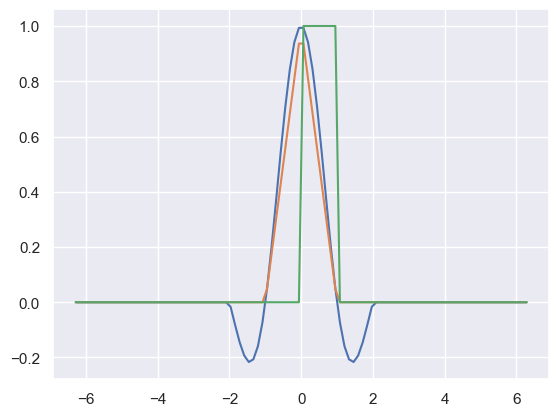

In [44]:
xk = np.linspace(-2 * np.pi, 2 * np.pi, 100)
plt.plot(xk, sinc_kernel(xk, x0=0, w=1, alpha=2))
plt.plot(xk, linear_kernel(xk, x0=0, w=1))
plt.plot(xk, kernel(xk, x0=0, w=1))

In [45]:
w = np.diff(x)[0]
w

1.3962634015954638

# **Funkcja sin(x)**

In [46]:
y_sinus = np.sin(x)

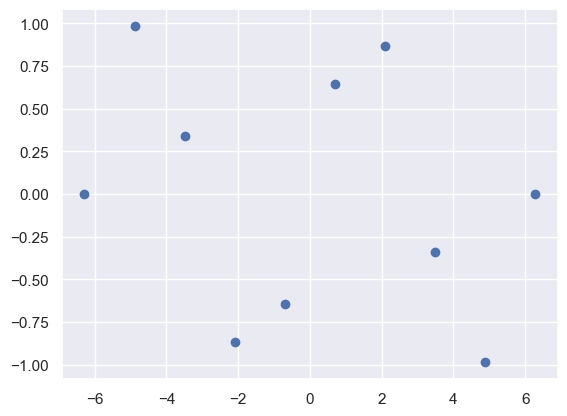

In [47]:
plt.scatter(x, y_sinus)

In [54]:
kernels = []

for xsample, ysample in zip(x, y_sinus):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 50)
    k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    kernels.append(k)

In [55]:
kernels = np.asarray(kernels)
kernels.shape

(10, 50)

In [56]:
yinterp = kernels.sum(axis=0)

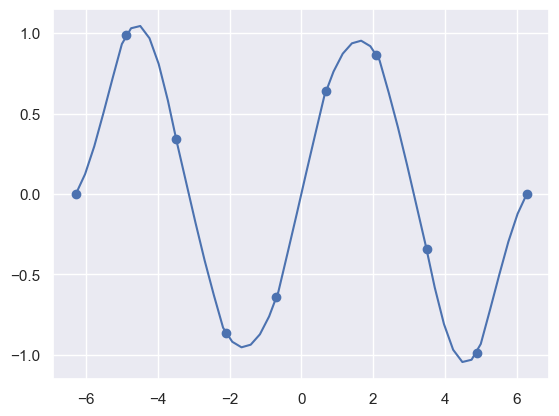

In [57]:
plt.plot(xk, yinterp)
plt.scatter(x, y_sinus)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
f"{(mean_squared_error(yinterp, np.sin(xk)) / np.std(np.sin(xk))):.4%}"

'0.7809%'

# **Funkcja $sin(x^{-1})$**

In [60]:
y_inv = np.sin(np.power(x, -1))

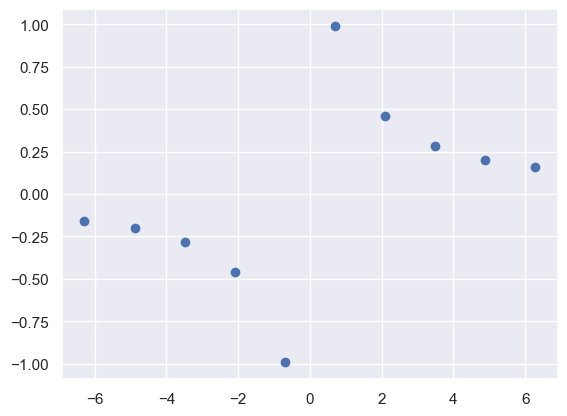

In [61]:
plt.scatter(x, y_inv)

In [62]:
kernels = []

for xsample, ysample in zip(x, y_inv):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 50)
    k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    kernels.append(k)

In [63]:
kernels = np.asarray(kernels)
kernels.shape

(10, 50)

In [64]:
yinterp = kernels.sum(axis=0)

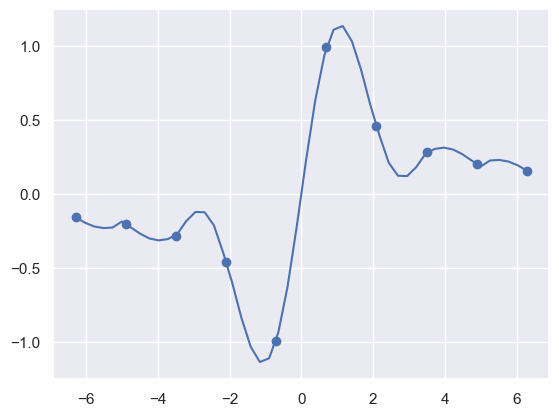

In [65]:
plt.plot(xk, yinterp)
plt.scatter(x, y_inv)

In [66]:
f"{(mean_squared_error(yinterp, np.sin(np.power(xk, -1))) / np.std(np.sin(np.power(xk, -1)))):.4%}"

'10.0014%'

# **Funkcja $sgn(sin{8x})$**

In [67]:
y_sgn = np.sign(np.sin(8*x))

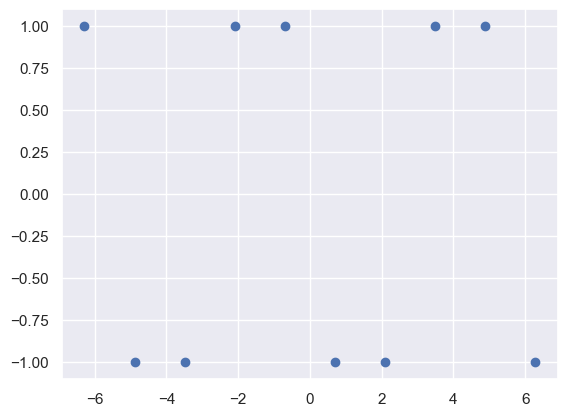

In [68]:
plt.scatter(x, y_sgn)

In [69]:
kernels = []

for xsample, ysample in zip(x, y_sgn):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 50)
    k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    kernels.append(k)


In [70]:
kernels = np.asarray(kernels)
kernels.shape

(10, 50)

In [71]:
yinterp = kernels.sum(axis=0)

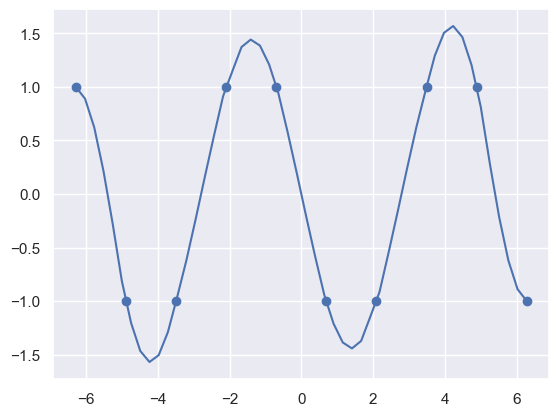

In [72]:
plt.plot(xk, yinterp)
plt.scatter(x, y_sgn)

In [73]:
f"{(mean_squared_error(yinterp, np.sign(np.sin(8*xk))) / np.std(np.sign(np.sin(8*xk)))):.4%}"

'192.3595%'